## Visualization of the interferometer precision and strategy

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from math import pi
from os.path import join
from os import makedirs
import bayesian_machine_learning.plot_utils as pu
from math import pi

In [54]:
#######################
sim_name = "interferometer"
batch_size = 2048
num_steps = 128
max_resources = 128
cumulative_loss = True
log_loss = False
#######################

In [55]:
def generate_name(
    sim_name, batch_size, num_steps, max_resources,
    cumulative_loss, log_loss, static=False,
):
    name = f"{sim_name}_"
    if static:
        name += "static_"
    name += f"batchsize_{batch_size}_num_steps_{num_steps}_"+\
        f"max_resources_{max_resources:.2f}_ll_{log_loss}_cl_{cumulative_loss}"
    return name

In [56]:
name_nn = generate_name(
    sim_name, batch_size, num_steps, max_resources, 
    cumulative_loss, log_loss, static=False,
)
name_static = generate_name(
    sim_name, batch_size, num_steps, max_resources,
    cumulative_loss, log_loss, static=True,
)

In [57]:
scratch_dir = "/scratch/fbelliardo"
data_dir = "./interferometer/data"

In [58]:
loss_nn_df = pd.read_csv(
    join(scratch_dir, f"{name_nn}_history.csv")
)
loss_nn_df['IterationsOver128'] = loss_nn_df.index+1

In [59]:
loss_static_df = pd.read_csv(
    join(scratch_dir, f"{name_static}_history.csv")
)
loss_static_df['IterationsOver128'] = loss_static_df.index+1

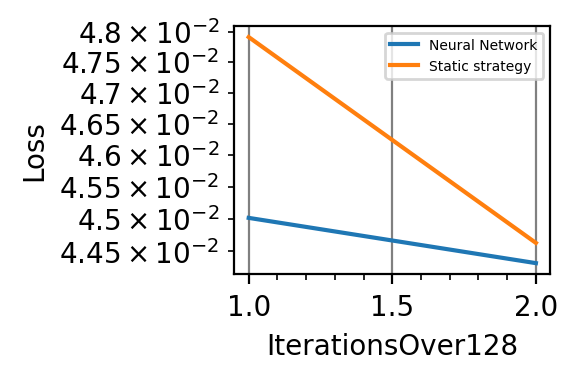

In [60]:
pu.plot_multiples(
    [loss_nn_df, loss_static_df], 
    "IterationsOver128", "Loss", 
    ["Neural Network", "Static strategy"],
    figsize=(3, 2), dpi=200,
    #title="Training history",
    log_scale=True,
)

In [62]:
prec_nn_df = pd.read_csv(
    join(data_dir, f'{name_nn}_eval.csv'),
    )
prec_static_df = pd.read_csv(
    join(data_dir, f'{name_static}_eval.csv'),
    )

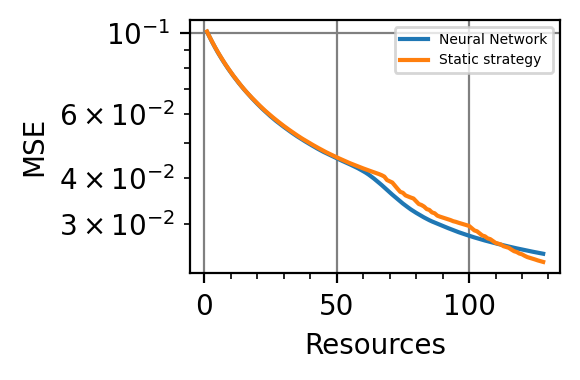

In [64]:
pu.plot_multiples(
    [prec_nn_df, prec_static_df], 
    "Resources", "MSE", 
    ["Neural Network", "Static strategy"],
    figsize=(3, 2), dpi=200,
    #title="Precision",
)

In [65]:
static = False
traj_num = 10

In [66]:
name = name_static if static else name_nn
traj_num = 1 if static else traj_num

In [67]:
data_df = pd.read_csv(
    join(data_dir, f'{name}_ext.csv'),
)

In [68]:
trajectory_list = [
    data_df[data_df['Estimation']==i] for i in range(traj_num)
]

In [69]:
phase_list = [f"{trajectory_list[i]['phase'].values[0]:.2f}"
              for i in range(traj_num)]

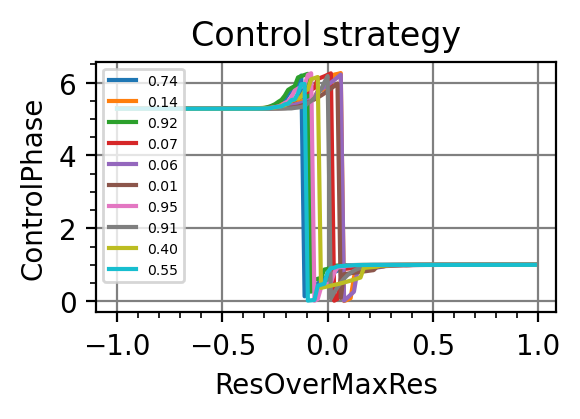

In [70]:
pu.plot_multiples(
    trajectory_list, "ResOverMaxRes", "ControlPhase",
    phase_list, log_scale=False, title="Control strategy",
    figsize=(3, 2.2), dpi=200,
    legend_location="upper left",
)

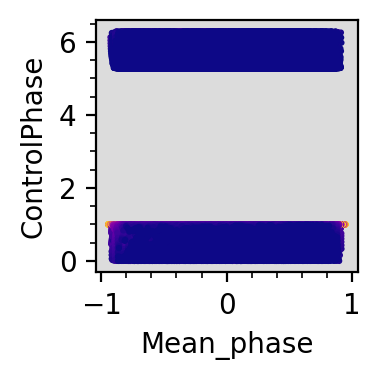

In [71]:
pu.plot_3_values(
    data_df, 
    "Mean_phase", "ControlPhase", color="ResOverMaxRes",
    figsize=(2, 2), dpi=200, 
)

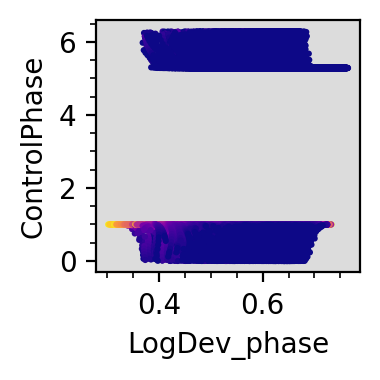

In [72]:
pu.plot_3_values(
    data_df, 
    "LogDev_phase", "ControlPhase", color="ResOverMaxRes",
    figsize=(2, 2), dpi=200, 
)